In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv(r'spam.csv',encoding='latin1')

## Explore Data

In [11]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.shape

(5572, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Cleaning Data

In [16]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [17]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
df=df.rename(columns={'v1': 'Target', 'v2': 'Text'})


In [19]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.isna().sum()

Target    0
Text      0
dtype: int64

In [23]:
df['Target'].replace({'ham':1 , 'spam':0},inplace=True)

In [24]:
df

,Target,Text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


## Data Analysis

In [25]:
df.Target.value_counts()

Target
1    4516
0     653
Name: count, dtype: int64

<Axes: ylabel='count'>

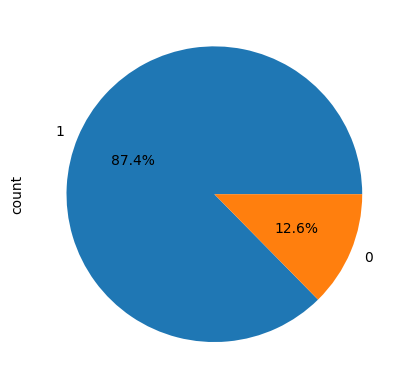

In [26]:
df.Target.value_counts().plot.pie(autopct='%.1f%%')

In [27]:
df['Num_Char']=df['Text'].apply(len)

In [28]:
df

,Target,Text,Num_Char
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161
5568,1,Will Ì_ b going to esplanade fr home?,37
5569,1,"Pity, * was in mood for that. So...any other s...",57
5570,1,The guy did some bitching but I acted like i'd...,125


In [29]:
df['Word_Num']=df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [34]:
df

,Target,Text,Num_Char,Word_Num
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,35
5568,1,Will Ì_ b going to esplanade fr home?,37,9
5569,1,"Pity, * was in mood for that. So...any other s...",57,15
5570,1,The guy did some bitching but I acted like i'd...,125,27


In [36]:
df['sent_num']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [37]:
df

,Target,Text,Num_Char,Word_Num,sent_num
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,1,Will Ì_ b going to esplanade fr home?,37,9,1
5569,1,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,1,The guy did some bitching but I acted like i'd...,125,27,1


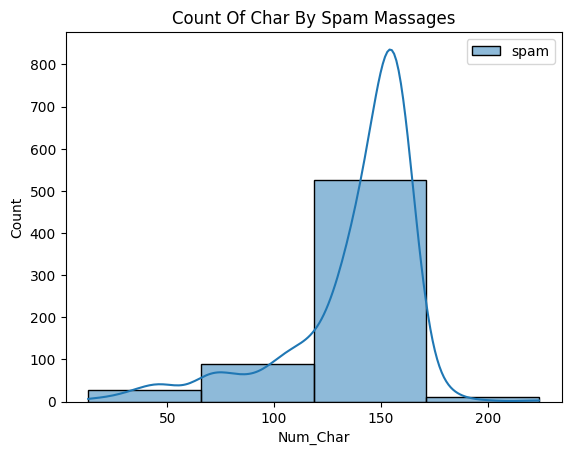

In [46]:
sns.histplot(df[df['Target']==0]['Num_Char'],binwidth=50,kde=True,label='spam')
plt.legend()
plt.title('Count Of Char By Spam Massages')
plt.show()

In [53]:
df_num=df[['Target','Num_Char','Word_Num','sent_num']]

In [55]:
corr=df_num.corr()

<Axes: >

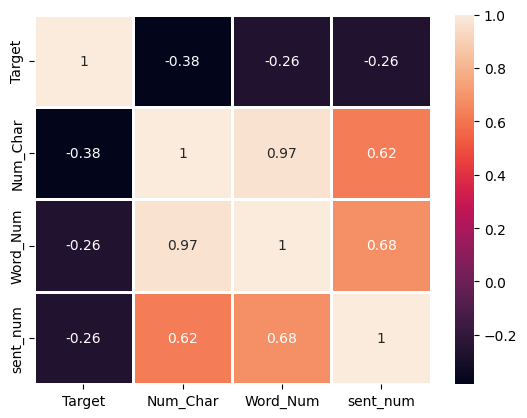

In [58]:
sns.heatmap(corr,annot=True,linewidths=1)

## Data Processing

* lower case
* tokenization
* remove special case
* remove stop words
* steaming

In [90]:
import string
punc=string.punctuation
from nltk.corpus import stopwords
stop=stopwords.words('English')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [96]:
def process(text):
    text=text.lower()
    token=nltk.word_tokenize(text)
    process_tokens=[]
    for word in token:
        if word not in punc and word not in stop:
            process_tokens.append(word)
    stemmd_tokens=[]
    for word in process_tokens:
        stemmd_tokens.append(ps.stem(word))
    
    return " ".join(stemmd_tokens)

In [ ]:
x='MY NAME IS morad## ELnahla $@@%@and played  i am going to play football'

In [102]:
process(x)

'name morad elnahla play go play footbal'

In [104]:
df['New_Text']=df["Text"].apply(process)

In [105]:
df

,Target,Text,Num_Char,Word_Num,sent_num,New_Text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though
...,...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u. u å£750 pound prize ...
5568,1,Will Ì_ b going to esplanade fr home?,37,9,1,ì_ b go esplanad fr home
5569,1,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood ... suggest
5570,1,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like 'd interest buy someth els ...


## Data Modeling

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()

In [109]:
x=cv.fit_transform(df['New_Text']).toarray()

In [110]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 7377))

In [116]:
y=df['Target'].values

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [124]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , precision_score , f1_score , confusion_matrix

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [122]:
gnb.fit(x_train,y_train)
gnb.predict(x_test)
accuracy_score(gnb.predict(x_test),y_test)

0.8839458413926499

In [126]:
model_names=['GaussianNB','MultinomialNB','BernoulliNB']
score=[]
precion=[]
f1=[]

In [129]:
def model(mo):
    mo.fit(x_train,y_train)
    pre=mo.predict(x_test)
    score.append(accuracy_score(pre,y_test))
    precion.append(precision_score(pre,y_test))
    f1.append(f1_score(pre,y_test))
    print(confusion_matrix(pre,y_test))


In [130]:
model(gnb)

[[108 110]
 [ 10 806]]


In [131]:
model(mnb)

[[113  11]
 [  5 905]]


In [132]:
model(bnb)

[[101   6]
 [ 17 910]]


In [134]:
ndf=pd.DataFrame({'Model_names':model_names, 'Accuracy':score,'Persesion':precion,'F1_Score':f1})

In [135]:
ndf

,Model_names,Accuracy,Persesion,F1_Score
0,GaussianNB,0.883946,0.879913,0.930716
1,MultinomialNB,0.984526,0.987991,0.991238
2,BernoulliNB,0.977756,0.993450,0.987520


<Axes: xlabel='Model_names'>

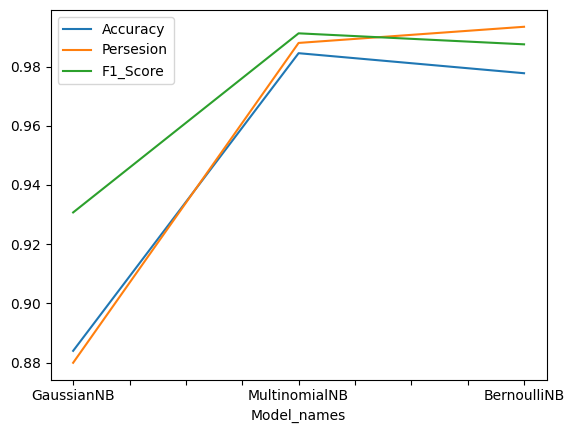

In [136]:
ndf.plot(x='Model_names',y=['Accuracy','Persesion','F1_Score'])

<Axes: xlabel='Model_names'>

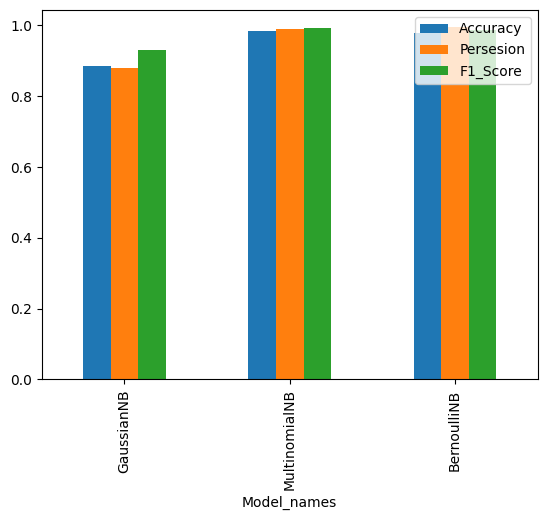

In [137]:
ndf.plot(x='Model_names',y=['Accuracy','Persesion','F1_Score'],kind='bar')